In [224]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.optimize import curve_fit
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.tsa.stattools as tools


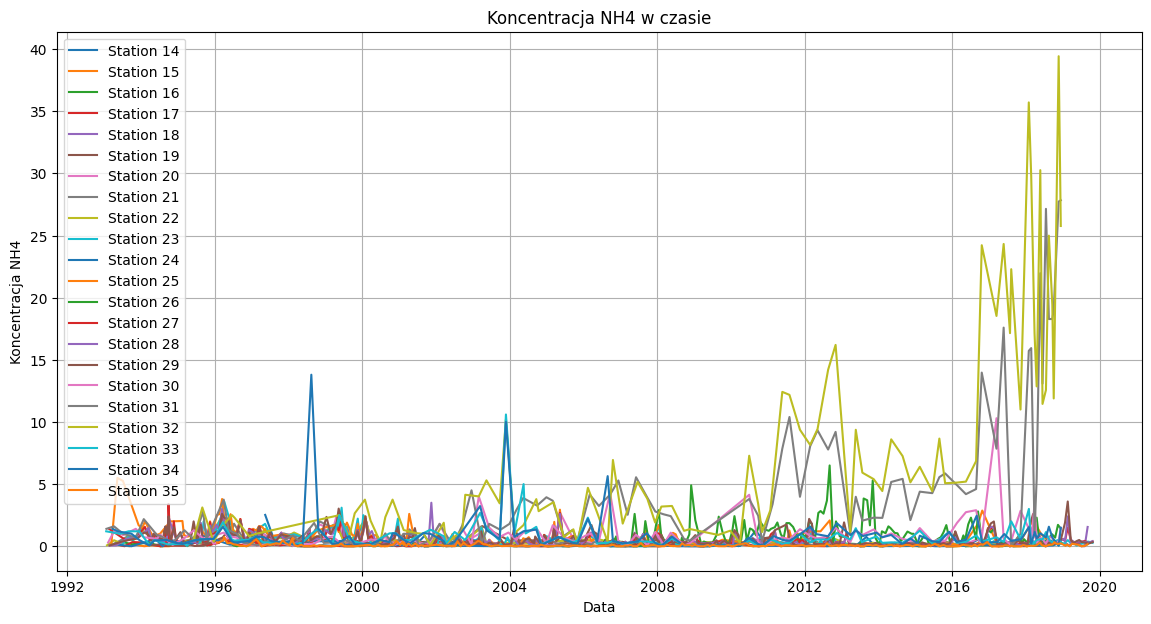

In [225]:
# Wczytanie danych z pliku CSV
data = pd.read_csv('data//PB_1996_2019_NH4.csv', sep=';')

data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y')

# Ustawienie daty jako indeks
data.set_index('Date', inplace=True)

# Wykres NH4 na przestrzeni czasu
plt.figure(figsize=(14, 7))
for station in data['ID_Station'].unique():
    station_data = data[data['ID_Station'] == station]
    plt.plot(station_data.index, station_data['NH4'], label=f'Station {station}')

plt.title('Koncentracja NH4 w czasie')
plt.xlabel('Data')
plt.ylabel('Koncentracja NH4')
plt.legend()
plt.grid(True)
plt.show()

In [226]:
from statsmodels.tsa.stattools import adfuller

# Funkcja do przeprowadzenia testu ADF
def perform_adf_test(data):
    result = adfuller(data)
    print('Test Statistic:', result[0])
    print('P-value:', result[1])
    print('Lags Used:', result[2])
    print('Critical Values:', result[4])

    # Interpretacja wyników
    if result[1] <= 0.05:
        print("Odrzucamy hipotezę o niestacjonarności. Dane są stacjonarne.")
    else:
        print("Nie ma podstaw do odrzucenia hipotezy o niestacjonarności. Dane są niestacjonarne.")

station_14_data = data[data['ID_Station'] == 29]
# Test ADF dla danych ze stacji o ID równym 14
print("Test ADF dla stężenia NH4 w stacji o ID równym 14:")
perform_adf_test(station_14_data['NH4'])

Test ADF dla stężenia NH4 w stacji o ID równym 14:
Test Statistic: -2.822043085911827
P-value: 0.055193403165912334
Lags Used: 10
Critical Values: {'1%': -3.451552879535732, '5%': -2.8708786756338407, '10%': -2.571745666091128}
Nie ma podstaw do odrzucenia hipotezy o niestacjonarności. Dane są niestacjonarne.


In [227]:
from statsmodels.tsa.arima.model import ARIMA

# Definicja maksymalnych wartości p, d i q
max_p = 4
max_d = 4
max_q = 4

best_aic = float("inf")
best_order = None

# Iteracja po możliwych wartościach p, d i q
for p in range(max_p + 1):
    for d in range(max_d + 1):
        for q in range(max_q + 1):
            # Sprawdzenie, czy przynajmniej jedna z wartości p, d lub q jest różna od zera
            if p != 0 or d != 0 or q != 0:
                try:
                    # Dopasowanie modelu ARIMA dla danej kombinacji p, d i q
                    model = ARIMA(station_14_data['NH4'], order=(p, d, q))
                    model_fit = model.fit()
                    # Sprawdzenie czy AIC jest niższe od aktualnie najlepszego
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p, d, q)
                except:
                    continue

print("Najlepszy model ARIMA:", best_order)
print("Wartość AIC:", best_aic)

c:\Users\mkosi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mkosi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mkosi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mkosi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provide

Najlepszy model ARIMA: (0, 1, 3)
Wartość AIC: 482.7169993316828


c:\Users\mkosi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [228]:
import pmdarima as pm

model2 = pm.auto_arima(station_14_data['NH4'],
                      d=0,
                      start_p=0, start_q=0, max_d=0,
                      max_p=4, max_q=4, max_order=6,
                      trace=True, seasonal=False,
                      #suppress_warnings=True,
                      stepwise=False
                      )

# print model summary
print(model2.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=814.979, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=646.594, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=596.556, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=585.290, Time=0.03 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=568.634, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=541.814, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=535.505, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=487.416, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=486.809, Time=0.12 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=488.309, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=541.071, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=490.293, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=487.230, Time=0.16 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=488.057, Time=0.17 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=490.337, Time=0.32 sec
 ARIMA(3,0,0)(0,0,0)[0]  

# Szukanie modelu ARMA

In [229]:
data = pd.read_csv('data//PB_1996_2019_NH4.csv', sep=';')

data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y')

data_sorted = data.sort_values(by='Date')

## 1. Wizualizacja danych

### ID  = 29/19

In [230]:

stacja1 = 29
stacja2 = 19


C:\Users\mkosi\AppData\Local\Temp\ipykernel_25760\712738156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data1['Date'] = pd.to_datetime(station_data1['Date'], format='%d.%m.%Y')


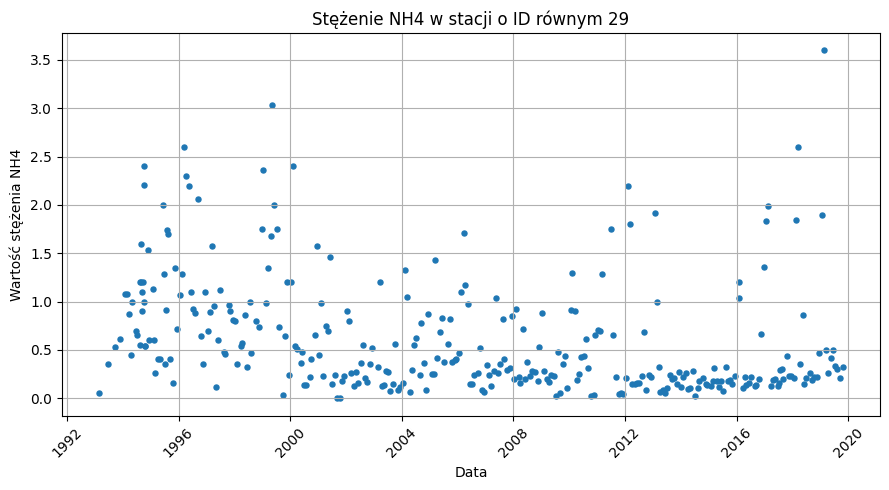

In [231]:

station_data1 = data[data['ID_Station'] == stacja1]

station_data1['Date'] = pd.to_datetime(station_data1['Date'], format='%d.%m.%Y')

plt.figure(figsize=(9, 5))
plt.scatter(station_data1['Date'], station_data1['NH4'], marker='o', linestyle='-', s=13)
plt.title(f'Stężenie NH4 w stacji o ID równym {stacja1}')
plt.xlabel('Data')
plt.ylabel('Wartość stężenia NH4')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


C:\Users\mkosi\AppData\Local\Temp\ipykernel_25760\2002945247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data2['Date'] = pd.to_datetime(station_data2['Date'], format='%d.%m.%Y')


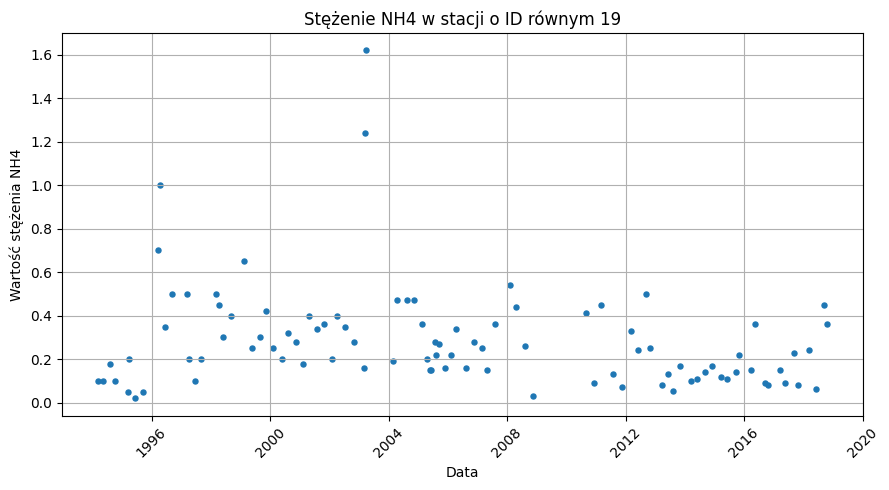

In [232]:

station_data2 = data[data['ID_Station'] == stacja2]

station_data2['Date'] = pd.to_datetime(station_data2['Date'], format='%d.%m.%Y')

plt.figure(figsize=(9, 5))
plt.scatter(station_data2['Date'], station_data2['NH4'], marker='o', linestyle='-', s=13)
plt.title(f'Stężenie NH4 w stacji o ID równym {stacja2}')
plt.xlabel('Data')
plt.ylabel('Wartość stężenia NH4')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


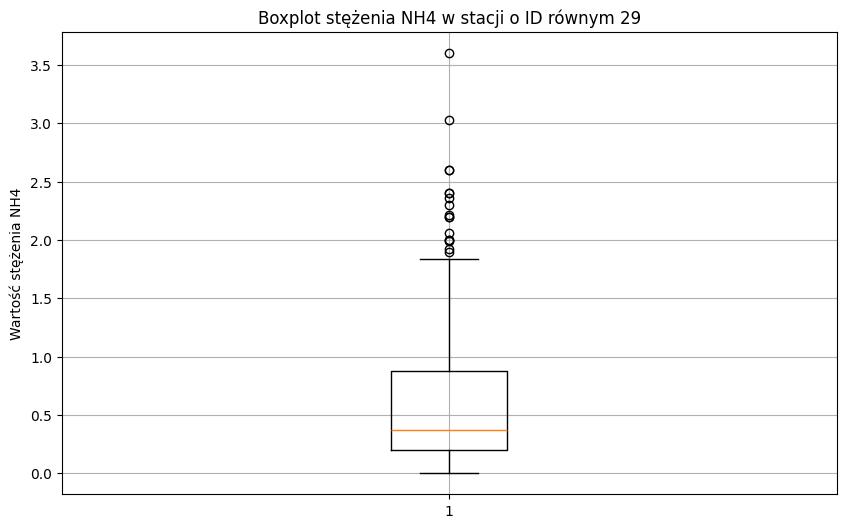

In [233]:
plt.figure(figsize=(10, 6))
plt.boxplot(station_data1['NH4'])
plt.title(f'Boxplot stężenia NH4 w stacji o ID równym {stacja1}')
plt.ylabel('Wartość stężenia NH4')
plt.grid(True)
plt.show()

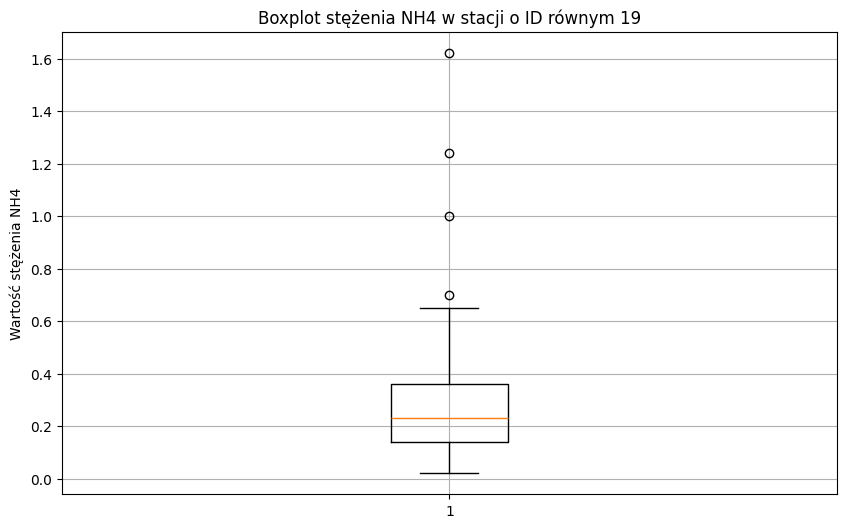

In [234]:
plt.figure(figsize=(10, 6))
plt.boxplot(station_data2['NH4'])
plt.title(f'Boxplot stężenia NH4 w stacji o ID równym {stacja2}')
plt.ylabel('Wartość stężenia NH4')
plt.grid(True)
plt.show()

# Wykresy ACF i PACF przed podziałem

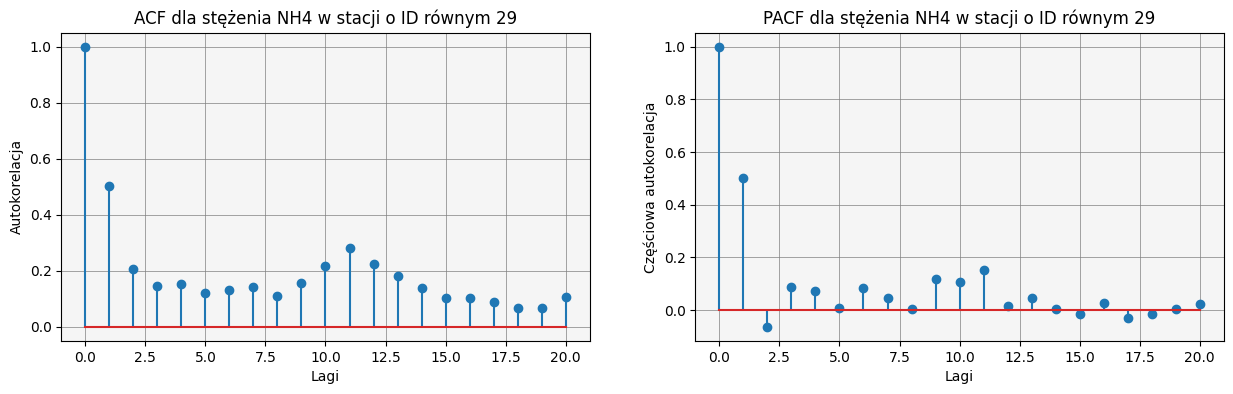

In [235]:
from statsmodels.tsa.stattools import acf, pacf

# Obliczenie funkcji autokorelacji
lags1 = min(len(station_data1) // 2, 20)  # liczba opóźnień
acf_values1 = acf(station_data1['NH4'], nlags=lags1)
pacf_values1 = pacf(station_data1['NH4'], nlags=lags1)

# Wykresy funkcji autokorelacji
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.stem(range(lags1 + 1), acf_values1)
plt.xlabel('Lagi')
plt.ylabel('Autokorelacja')
plt.title('ACF dla stężenia NH4 w stacji o ID równym 29')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('whitesmoke')

plt.subplot(1,2,2)
plt.stem(range(lags1 + 1), pacf_values1)
plt.xlabel('Lagi')
plt.ylabel('Częściowa autokorelacja')
plt.title('PACF dla stężenia NH4 w stacji o ID równym 29')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('whitesmoke')
plt.show()

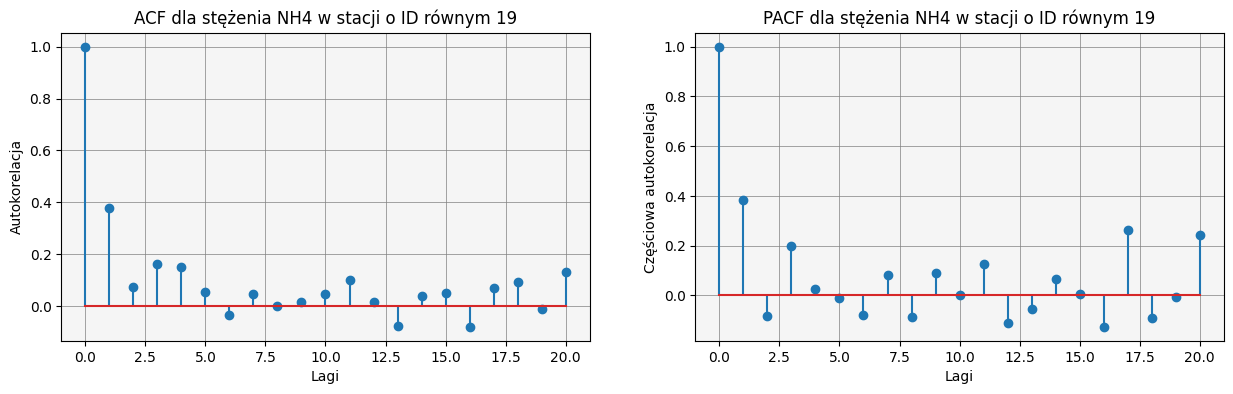

In [236]:

# Obliczenie funkcji autokorelacji
lags2 = min(len(station_data2) // 2, 20)  # liczba opóźnień
acf_values2 = acf(station_data2['NH4'], nlags=lags2)
pacf_values2 = pacf(station_data2['NH4'], nlags=lags2)

# Wykresy funkcji autokorelacji
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.stem(range(lags2 + 1), acf_values2)
plt.xlabel('Lagi')
plt.ylabel('Autokorelacja')
plt.title(f'ACF dla stężenia NH4 w stacji o ID równym {stacja2}')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('whitesmoke')

plt.subplot(1,2,2)
plt.stem(range(lags2 + 1), pacf_values2)
plt.xlabel('Lagi')
plt.ylabel('Częściowa autokorelacja')
plt.title(f'PACF dla stężenia NH4 w stacji o ID równym {stacja2}')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('whitesmoke')
plt.show()

In [237]:
X1 = station_data1['NH4']
t_list1 = np.arange(0,(len(X1)),1)
a, b = np.polyfit(t_list1, X1, deg=1)
n = len(station_data1)

X_no_trend1 = np.zeros(n)
print(len(X1))
for t in range(1,n):
    X_no_trend1[t] =  X1[t+2357] - a*t - b

322


In [238]:
def funcc(x,c,d,e):
    y = c*np.sin(d*x+e)
    return y



params, sth = curve_fit(funcc, t_list1, X_no_trend1, p0 = [3,0.004,0])
hat_c, hat_d, hat_e = params

X_no_seasonality1 = np.zeros(n)

for t in range(1,n):
    X_no_seasonality1[t] =  X_no_trend1[t] - hat_c*np.sin(hat_d*t+hat_e)

from statsmodels.tsa.stattools import acf, pacf


lags = min(len(X_no_seasonality1) // 2, 50)  # liczba opóźnień
acf_values = acf(X_no_seasonality1, nlags=lags)
pacf_values = pacf(X_no_seasonality1, nlags=lags)


plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.stem(range(lags + 1), acf_values)
plt.xlabel('Lagi')
plt.ylabel('Autokorelacja')
plt.title('ACF dla stężenia NH4 w stacji o ID równym 29')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('whitesmoke')

plt.subplot(1,2,2)
plt.stem(range(lags + 1), pacf_values)
plt.xlabel('Lagi')
plt.ylabel('Częściowa autokorelacja')
plt.title('PACF dla stężenia NH4 w stacji o ID równym 29')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('whitesmoke')
plt.show()

In [239]:
from statsmodels.tsa.stattools import adfuller

# Funkcja do przeprowadzenia testu ADF
def perform_adf_test(data):
    result = adfuller(data)
    print('Test Statistic:', result[0])
    print('P-value:', result[1])
    print('Lags Used:', result[2])
    print('Critical Values:', result[4])

    # Interpretacja wyników
    if result[1] <= 0.05:
        print("Odrzucamy hipotezę o niestacjonarności. Dane są stacjonarne.")
    else:
        print("Nie ma podstaw do odrzucenia hipotezy o niestacjonarności. Dane są niestacjonarne.")

# Test ADF dla danych ze stacji o ID równym 14
print("Test ADF dla stężenia NH4 w stacji o ID równym 14:")
perform_adf_test(X_no_seasonality1)

Test ADF dla stężenia NH4 w stacji o ID równym 14:
Test Statistic: -8.091231162221238
P-value: 1.3765230957818361e-12
Lags Used: 10
Critical Values: {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}
Odrzucamy hipotezę o niestacjonarności. Dane są stacjonarne.


## 2. Podział danych do przyszłej predykcji

In [240]:
train_data1 = station_data1[:int(0.9*len(station_data1))]
test_data1= station_data1[int(0.9*len(station_data1)):]

In [241]:
train_data2 = station_data2[:int(0.9*len(station_data2))]
test_data2 = station_data2[int(0.9*len(station_data2)):]

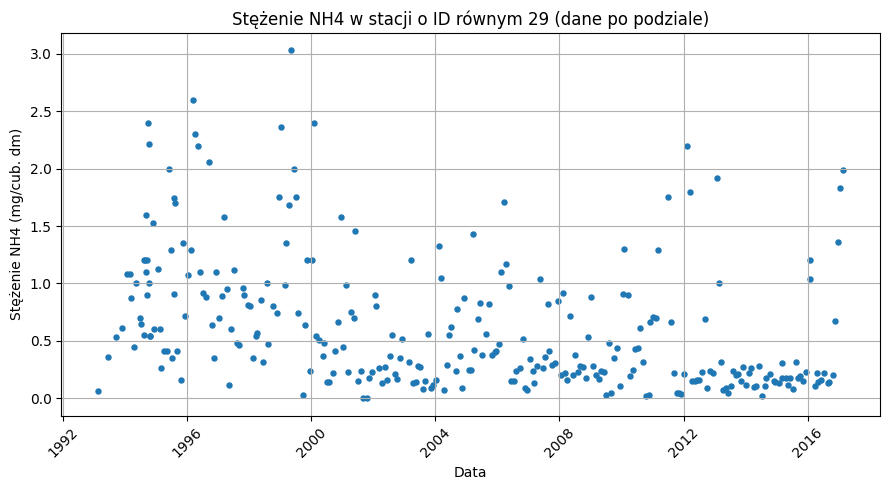

In [242]:
plt.figure(figsize=(9, 5))
plt.scatter(train_data1['Date'], train_data1['NH4'], marker='o', linestyle='-', s=13)
plt.title(f'Stężenie NH4 w stacji o ID równym {stacja1} (dane po podziale)')
plt.xlabel('Data')
plt.ylabel('Stężenie NH4 (mg/cub. dm)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()



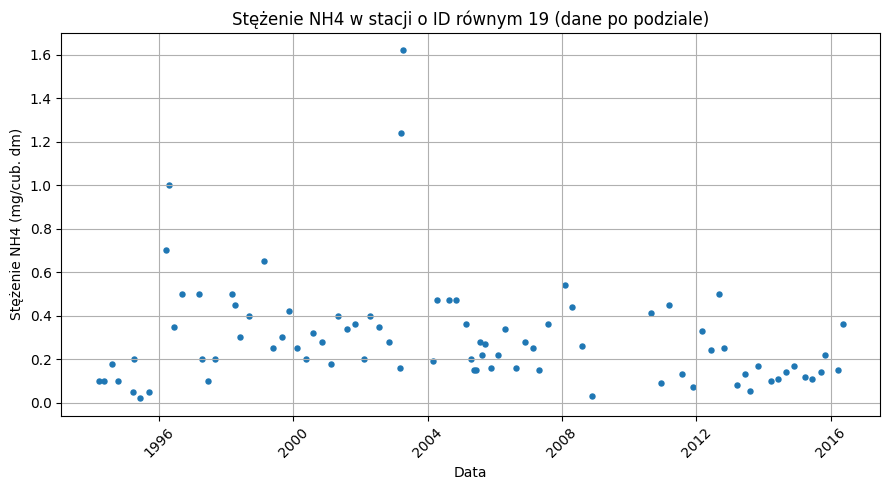

In [243]:
plt.figure(figsize=(9, 5))
plt.scatter(train_data2['Date'], train_data2['NH4'], marker='o', linestyle='-', s=13)
plt.title(f'Stężenie NH4 w stacji o ID równym {stacja2} (dane po podziale)')
plt.xlabel('Data')
plt.ylabel('Stężenie NH4 (mg/cub. dm)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## 3. Usuwanie trendu i sezonowości

2357    0.06
2358    0.36
2359    0.53
2360    0.61
2361    1.08
        ... 
2641    0.20
2642    0.67
2643    1.36
2644    1.83
2645    1.99
Name: NH4, Length: 289, dtype: float64


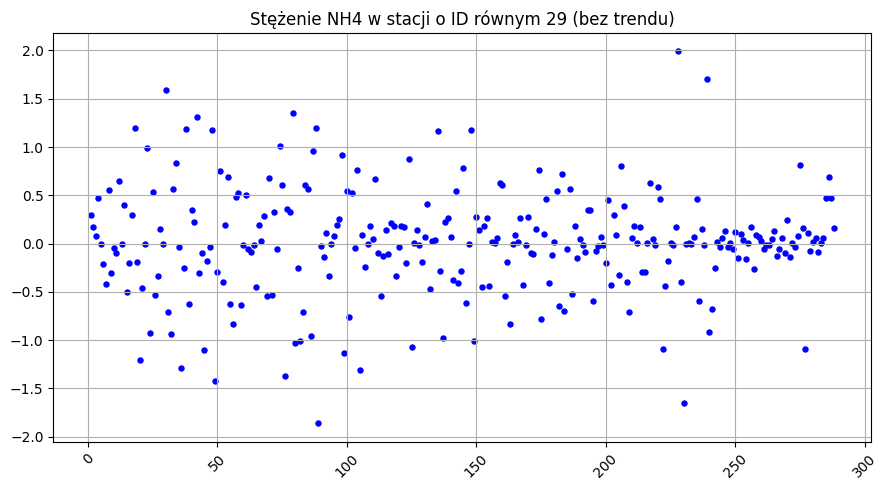

In [244]:
X1 = train_data1['NH4']
print(X1)
t_list1 = np.arange(0,(len(X1)),1)
a1, b1 = np.polyfit(t_list1, X1, deg=1)
n1 = len(train_data1)

X_no_trend1 = np.zeros(n1)



for t in range(1,n1):
    
    X_no_trend1[t] =  X1[t+2357] - a1*t - b1


# jednak robimy roznicowanie bo jest efektywniejsze w uduwaniu trendu (stalych wzrostów/spadków)
X_no_trend1 = np.diff(X1)

plt.figure(figsize=(9, 5))



plt.scatter(t_list1[1:],X_no_trend1, marker='o', linestyle='-', s=13, c="blue")
#plt.scatter(t_list1,X1, marker='o', linestyle='-', s=13)

plt.title(f"Stężenie NH4 w stacji o ID równym {stacja1} (bez trendu)")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()




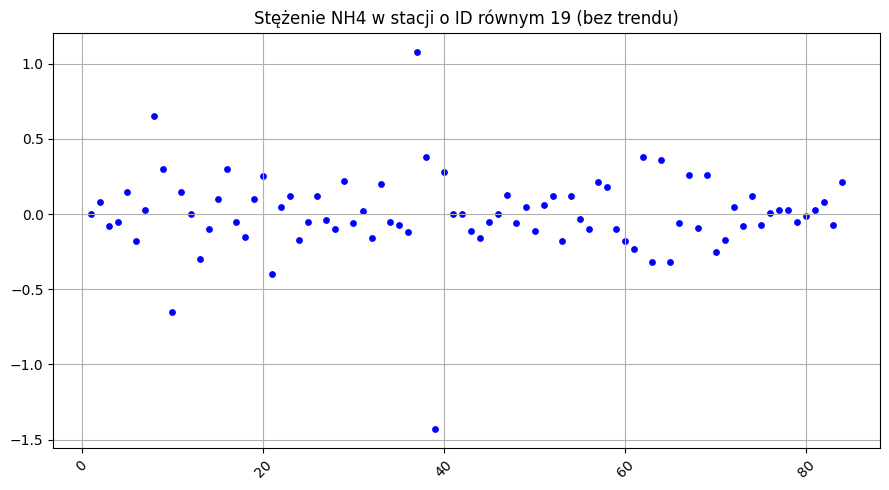

In [245]:
X2 = train_data2['NH4']
t_list2 = np.arange(0,(len(X2)),1)
a2, b2 = np.polyfit(t_list2, X2, deg=1)
n2 = len(train_data2)

X_no_trend2 = np.zeros(n2)

for t in range(1,n2):
    
    X_no_trend2[t] =  X2[t+630] - a2*t - b2



X_no_trend2= np.diff(X2)

plt.figure(figsize=(9, 5))

plt.scatter(t_list2[1:],X_no_trend2, marker='o', linestyle='-', s=15, c="blue")

plt.title(f"Stężenie NH4 w stacji o ID równym {stacja2} (bez trendu)")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

## fukcja do sezonowsci 

In [246]:
def funcc(x,c,d,e):
    y = c*np.sin(d*x+e)
    return y

Text(0.5, 11.172785931815357, 'Kolejne numery dni pomiarowych')

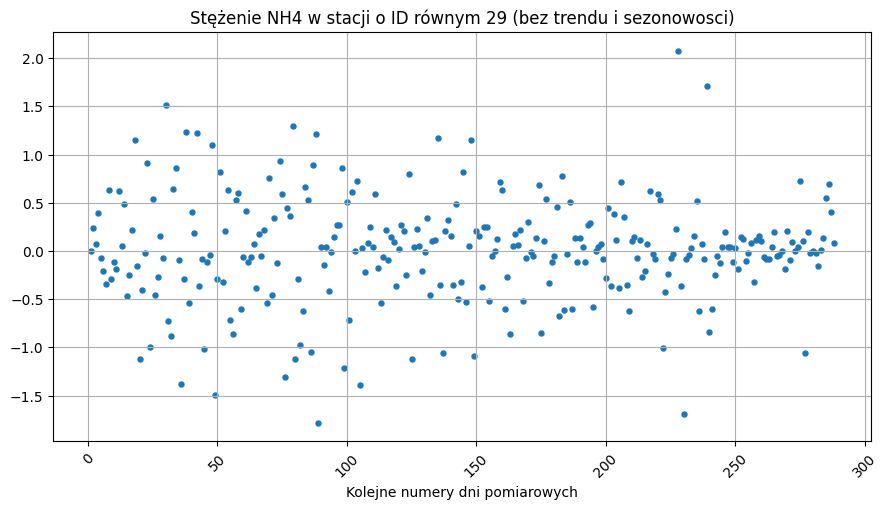

In [247]:


params1, sth = curve_fit(funcc, t_list1[1:], X_no_trend1)
hat_c1, hat_d1, hat_e1 = params1

X_no_seasonality1 = np.zeros(len(X_no_trend1))

for t in range(1, len(X_no_trend1)):
    X_no_seasonality1[t] =  X_no_trend1[t] - hat_c1*np.sin(hat_d1*t+hat_e1)

plt.figure(figsize=(9, 5))

plt.scatter(t_list1[1:], X_no_seasonality1, marker='o', linestyle='-', s=13)
#plt.scatter(t_list1[1:], X_no_trend1 ,marker='o', linestyle='-', s=13, c="red") #tu nie bylo sezonowosci

plt.title(f"Stężenie NH4 w stacji o ID równym {stacja1} (bez trendu i sezonowosci)")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Kolejne numery dni pomiarowych')


Text(0.5, 17.359970267197646, 'Kolejne numery dni pomiarowych')

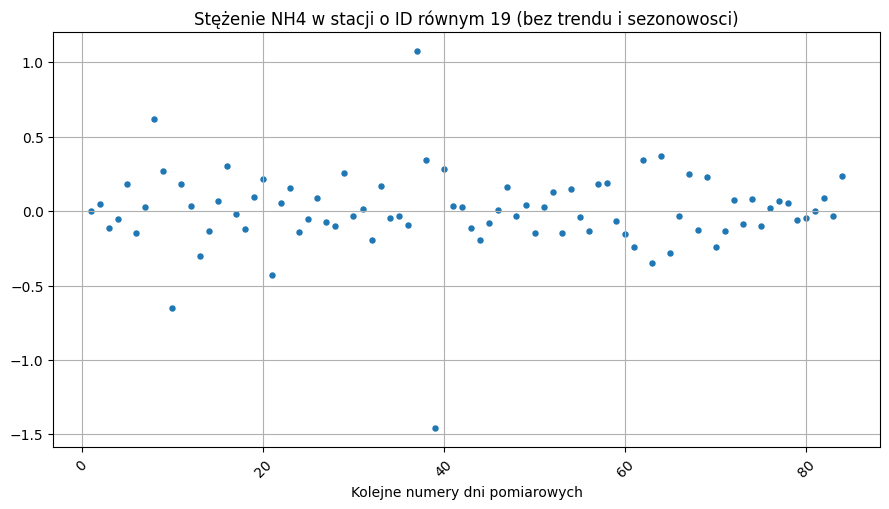

In [248]:
params2, sth = curve_fit(funcc, t_list2[1:], X_no_trend2)
hat_c2, hat_d2, hat_e2 = params2
n2=len(X_no_trend2)
X_no_seasonality2 = np.zeros(n2)

for t in range(1,n2):
    X_no_seasonality2[t] =  X_no_trend2[t] - hat_c2*np.sin(hat_d2*t+hat_e2)

plt.figure(figsize=(9, 5))

plt.scatter(t_list2[1:], X_no_seasonality2, marker='o', linestyle='-', s=13)
#plt.scatter(t_list2[1:], X_no_trend2, marker='o', linestyle='-', s=13, c="pink") #tu nie bylo sezonowosci

plt.title(f"Stężenie NH4 w stacji o ID równym {stacja2} (bez trendu i sezonowosci)")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Kolejne numery dni pomiarowych')

## 4. Dopasowanie modelu ARMA(p,q)

In [249]:
station_data_clean1 = X_no_seasonality1

model1 = pm.auto_arima(station_data_clean1,
                      d=0,
                      start_p=0, start_q=0, max_d=0,
                      max_p=4, max_q=4, max_order=6,
                      trace=True, seasonal=False,
                      #suppress_warnings=True,
                      stepwise=False
                      )

print(model1.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=470.975, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=432.282, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=395.305, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=393.916, Time=0.05 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=395.545, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=458.974, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=395.226, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=394.332, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=394.908, Time=0.10 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=396.907, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=436.715, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=394.377, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=396.259, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=396.907, Time=0.14 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(3,0,0)(0,0,0)[0]      

In [250]:
from statsmodels.tsa.arima.model import ARIMA

# Definicja maksymalnych wartości p, d i q
max_p = 4
max_d = 4
max_q = 4

best_aic = float("inf")
best_order = None

# Iteracja po możliwych wartościach p, d i q
for p in range(max_p + 1):
    for d in range(max_d + 1):
        for q in range(max_q + 1):
            # Sprawdzenie, czy przynajmniej jedna z wartości p, d lub q jest różna od zera
            if p != 0 or d != 0 or q != 0:
                try:
                    # Dopasowanie modelu ARIMA dla danej kombinacji p, d i q
                    model = ARIMA(station_data_clean1, order=(p, d, q))
                    model_fit = model.fit()
                    # Sprawdzenie czy AIC jest niższe od aktualnie najlepszego
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p, d, q)
                except:
                    continue

print("Najlepszy model ARIMA:", best_order)
print("Wartość AIC:", best_aic)

c:\Users\mkosi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\mkosi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\mkosi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\mkosi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

Najlepszy model ARIMA: (0, 0, 3)
Wartość AIC: 395.0783143750051


Obserwujemy że najlepiej dopasowany jest model ARMA(0,3) 

# dopasowanie modelu arma

In [251]:
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.arima.model import ARIMA


p, q = 0, 3

# Dopasowanie modelu MA(3)
model = ARIMA(station_data_clean1, order=(0, 0, 3))  # MA(3) model
model_fit = model.fit()

# Test Jarque-Bera dla reszt modelu
jb_test = jarque_bera(model_fit.resid)
print(jb_test)





(68.71961112991339, 1.1959858566965835e-15, 0.8796992856265564, 4.622082281605536)


In [252]:
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.arima.model import ARIMA

# Dopasowanie modelu MA(2)
model = ARIMA(station_data_clean1, order=(0, 0, 2))  # MA(2) model
model_fit = model.fit()

# Test Jarque-Bera dla reszt modelu
jb_test = jarque_bera(model_fit.resid)
print(jb_test)

(70.35727678816582, 5.273651958552169e-16, 0.9073406721838078, 4.603133811451172)


In [253]:
import statsmodels.api as sm

q1 = 3  # Replace with the desired order of MA
order1 = (0, 0, q1)

# Fit the MA model
model = sm.tsa.ARIMA(X_no_seasonality1, order=order1)
fitted_model1 = model.fit()

ma_mparams_1 = fitted_model1.maparams

# Print the model summary
print(fitted_model1.summary())
print(fitted_model1.maparams)
sigma2_1  = 0.2212

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  288
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -192.539
Date:                Sun, 02 Jun 2024   AIC                            395.078
Time:                        18:03:32   BIC                            413.393
Sample:                             0   HQIC                           402.418
                                - 288                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.002     -1.212      0.225      -0.006       0.001
ma.L1         -0.4821      0.057     -8.507      0.000      -0.593      -0.371
ma.L2         -0.3507      0.061     -5.767      0.0

In [254]:
from statsmodels.stats.diagnostic import acorr_ljungbox

model1 = ARIMA(station_data_clean1, order=(0, 0, 3))  # MA(2) model
model_fit1 = model1.fit()

lb_test1 = acorr_ljungbox(model_fit1.resid, lags=[10], return_df=True)
print(lb_test1)

     lb_stat  lb_pvalue
10  4.619839   0.915085


In [255]:
model11 = ARIMA(station_data_clean1, order=(p, 0, q)).fit()
resid1 = (model11.resid)

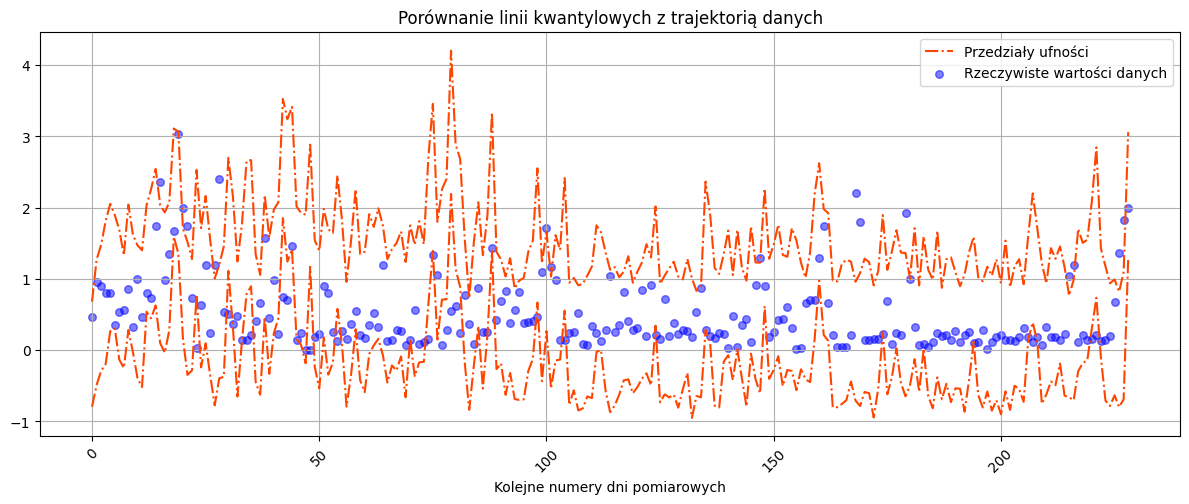

In [256]:
train_data_NH4_1 = train_data1['NH4']

okres_sez = 60

# Liczba próbek i długość danych
N = 100
n = len(train_data1[okres_sez:])

# Generowanie trajektorii ARMA
ar_models = [arma_generate_sample(ar=[1], ma= [1]+list(ma_mparams_1[-1:1]), nsample=n, scale=np.sqrt(sigma2_1) ) for _ in range(N)]
ar_seasonal_models = [ar_model + train_data_NH4_1[:-okres_sez] for ar_model in ar_models]


# Obliczanie kwantyli dla przedziału ufności
alpha = 0.05
quantiles_lower = np.quantile(ar_seasonal_models, alpha/2, axis=0)
quantiles_upper = np.quantile(ar_seasonal_models, 1 - alpha/2, axis=0)

# Rysowanie wykresu
plt.figure(figsize=(12, 5))
line1, = plt.plot(range(n), quantiles_lower, c='orangered', linewidth=3/2, linestyle="dashdot")
line2, = plt.plot(range(n), quantiles_upper, c='orangered', linewidth=3/2, linestyle="dashdot")
line3 = plt.scatter(range(n), train_data_NH4_1[okres_sez:], s=30, c='blue', alpha=0.5)
plt.legend([line1, line3], ['Przedziały ufności', 'Rzeczywiste wartości danych'])
plt.xlabel('Kolejne numery dni pomiarowych')
plt.grid()
plt.title("Porównanie linii kwantylowych z trajektorią danych")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [257]:
# Obliczanie procentu danych w przedziale ufności
in_confidence_interval = np.logical_and(train_data_NH4_1[okres_sez:] >= quantiles_lower, train_data_NH4_1[okres_sez:] <= quantiles_upper)
percentage_in_confidence_interval = np.mean(in_confidence_interval) * 100

print("Procent danych w przedziale ufności: {:.2f}%".format(percentage_in_confidence_interval))


Procent danych w przedziale ufności: 81.22%


## 5. Wyznaczenie przedziałów ACF i PACF

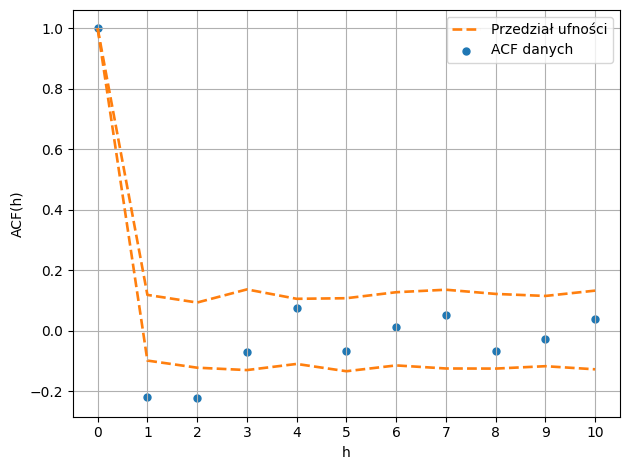

In [258]:
h = 10

correlation_matrix = np.array([tools.acf(m, nlags=h) for m in ar_models])
alpha = 0.05
quantiles_lower = np.quantile(correlation_matrix, alpha/2, axis=0)
quantiles_upper = np.quantile(correlation_matrix, 1 - alpha/2, axis=0)

line1, = plt.plot(range(h+1), quantiles_lower, linestyle="dashed", color="C1",linewidth=1.9)
plt.plot(range(h+1), quantiles_upper,  linestyle="dashed", color="C1",linewidth=1.9)
line2 = plt.scatter(range(h+1), tools.acf(station_data_clean1, nlags=h), s=25)
plt.xlabel('h')
plt.ylabel('ACF(h)')
plt.legend([line1, line2], ['Przedział ufności', 'ACF danych'])
plt.xticks(ticks=range(0,11))
plt.grid()
plt.tight_layout()


([<matplotlib.axis.XTick at 0x2691bf58700>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

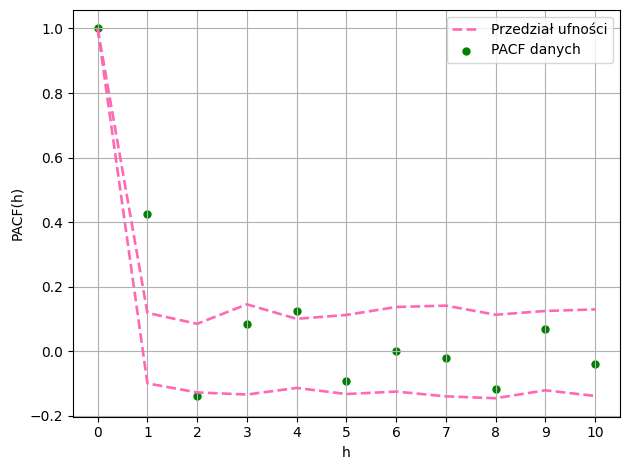

In [259]:
h= 10
partial_correlation_matrix = np.array([tools.pacf(m, nlags=h) for m in ar_models])
alpha = 0.05
quantiles_lower = np.quantile(partial_correlation_matrix, alpha/2, axis=0)
quantiles_upper = np.quantile(partial_correlation_matrix, 1 - alpha/2, axis=0)

line1, = plt.plot(range(h+1), quantiles_lower, c='hotpink', linestyle="dashed", linewidth=1.9)
plt.plot(range(h+1), quantiles_upper,linestyle="dashed", color="hotpink",linewidth=1.9)
line2 = plt.scatter(range(h+1), tools.pacf(station_data_clean, nlags=h), color="g", s=25)
plt.xlabel('h')
plt.ylabel('PACF(h)')
plt.grid()
plt.tight_layout()
plt.legend([line1, line2], ['Przedział ufności', 'PACF danych'])
plt.xticks(ticks=range(0,11))


# Predykcje

a. ID=29

MSE: 0.17697623915312327
RMSE: 0.42068543967330657


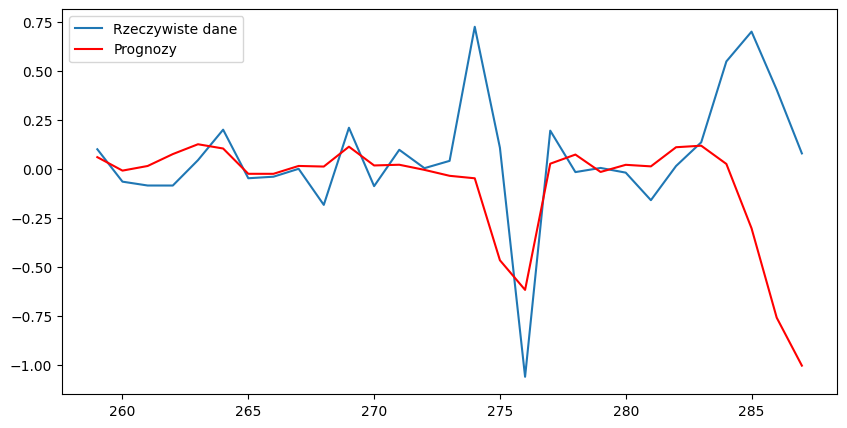

In [260]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Upewnij się, że dane są w odpowiednim formacie
X_no_seasonality1 = pd.Series(X_no_seasonality1).astype(float)

# Podział danych na zestaw treningowy i testowy (90% trening, 10% test)
train_data1 = X_no_seasonality1[:int(0.9 * len(X_no_seasonality1))]
test_data1 = X_no_seasonality1[int(0.9 * len(X_no_seasonality1)):]

# Prognozowanie krok-po-kroku na danych testowych
history = [x for x in train_data1]
predictions = list()

for t in range(len(test_data1)):
    model = ARIMA(history, order=(0, 0, 2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data1.iloc[t]
    history.append(obs)

# Ocena skuteczności modelu
mse = mean_squared_error(test_data1, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

station30 = data[data['ID_Station'] == 30]
xs = station30[:33]

# Wykres rzeczywistych danych testowych i prognoz
plt.figure(figsize=(10, 5))
plt.plot(test_data1.index, test_data1, label='Rzeczywiste dane')
plt.plot(test_data1.index, predictions, color='red', label='Prognozy')
plt.legend()
plt.show()

Text(0.5, 0, 't')

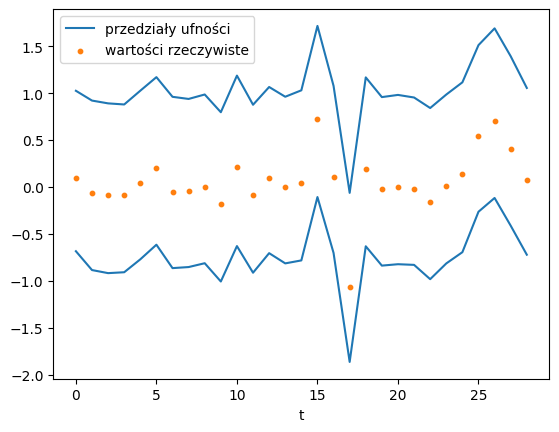

In [261]:

n = len(test_data1)
N = 10000

parameters = model_fit1.params
residuals = model_fit1.resid

ar_models = [arma_generate_sample(ar=[1], ma=[1]+ list(-ma_mparams_1[1: -1]),  nsample=n, scale=np.std(residuals)) for _ in range(N)]
ar_seasonal_models = [ar_model + test_data1.values for ar_model in ar_models]

quantiles_lower = np.quantile(ar_seasonal_models, alpha, axis=0)
quantiles_upper = np.quantile(ar_seasonal_models, 1 - alpha/2, axis=0)

station30 = data[data['ID_Station'] == 29]
xs = station30[:33]

line1, = plt.plot(range(n), quantiles_lower, c='C0')
line2, = plt.plot(range(n), quantiles_upper, c='C0')
line3 = plt.scatter(range(n), test_data1.values, s=10, c='C1')
plt.legend([line1, line3], ['przedziały ufności', 'wartości rzeczywiste'])
plt.xlabel('t')

b. ID=19

C:\Users\mkosi\AppData\Local\Temp\ipykernel_25760\3816141157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['Date'] = pd.to_datetime(station_data['Date'], format='%d.%m.%Y')


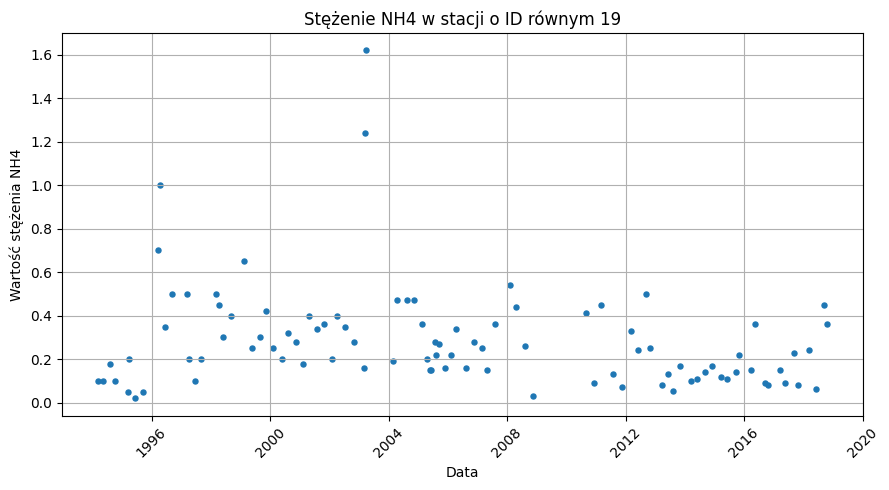

95


In [262]:
stacja = 19
station_data = data[data['ID_Station'] == stacja]

station_data['Date'] = pd.to_datetime(station_data['Date'], format='%d.%m.%Y')

plt.figure(figsize=(9, 5))
plt.scatter(station_data['Date'], station_data['NH4'], marker='o', linestyle='-', s=13)
plt.title(f'Stężenie NH4 w stacji o ID równym {stacja}')
plt.xlabel('Data')
plt.ylabel('Wartość stężenia NH4')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
print(len(station_data))

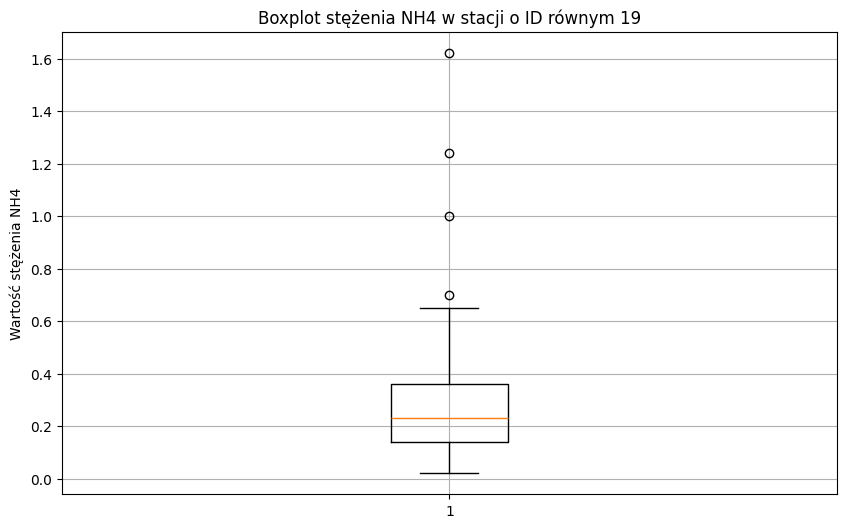

In [263]:
plt.figure(figsize=(10, 6))
plt.boxplot(station_data['NH4'])
plt.title(f'Boxplot stężenia NH4 w stacji o ID równym {stacja}')
plt.ylabel('Wartość stężenia NH4')
plt.grid(True)
plt.show()

In [264]:
train_data = station_data[:int(0.9*len(station_data))]
test_data = station_data[int(0.9*len(station_data)):]

In [265]:
X2 = train_data['NH4']
t_list1 = np.arange(0,(len(X2)),1)
a, b = np.polyfit(t_list1, X2, deg=1)
n = len(station_data)

X_no_trend2 = np.zeros(n)

for t in range(1,n):
    X_no_trend2[t] =  X2[t+2357] - a*t - b






KeyError: 2358

In [ ]:
def funcc(x,c,d,e):
    y = c*np.sin(d*x+e)
    return y

params, sth = curve_fit(funcc, t_list, X_no_trend, p0 = [3,0.004,0])
hat_c, hat_d, hat_e = params

X_no_seasonality = np.zeros(n)

for t in range(1,n):
    X_no_seasonality[t] =  X_no_trend[t] - hat_c*np.sin(hat_d*t+hat_e)


In [ ]:
station_data_clean = X_no_seasonality

model2 = pm.auto_arima(station_data_clean, 
                      d=0,
                      start_p=0, start_q=0, max_d=0, 
                      max_p=4, max_q=4, max_order=6,
                      trace=True, seasonal=False,
                      #suppress_warnings=True, 
                      stepwise=False
                      )

print(model2.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=187.692, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=169.166, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=169.563, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=170.950, Time=0.04 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=171.244, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=169.315, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=169.846, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=171.577, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=173.370, Time=0.11 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=172.342, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=170.088, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=171.829, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=173.501, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=174.263, Time=0.11 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=174.082, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0]  

In [ ]:
import statsmodels.api as sm

q = 1  # Replace with the desired order of MA
order = (0, 0, q)

# Fit the MA model
model = sm.tsa.ARIMA(X_no_seasonality, order=order)
fitted_model = model.fit()

# Print the model summary
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   95
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -81.759
Date:                Sun, 02 Jun 2024   AIC                            169.518
Time:                        11:54:47   BIC                            177.180
Sample:                             0   HQIC                           172.614
                                 - 95                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1080      0.104      1.035      0.301      -0.096       0.312
ma.L1          0.4296      0.100      4.290      0.000       0.233       0.626
sigma2         0.3267      0.051      6.353      0.0

In [ ]:

p, q = 0, 1

# Współczynniki modelu MA(2)
ma_params = [1, 0.4296 ]
sigma2 = 0.3267

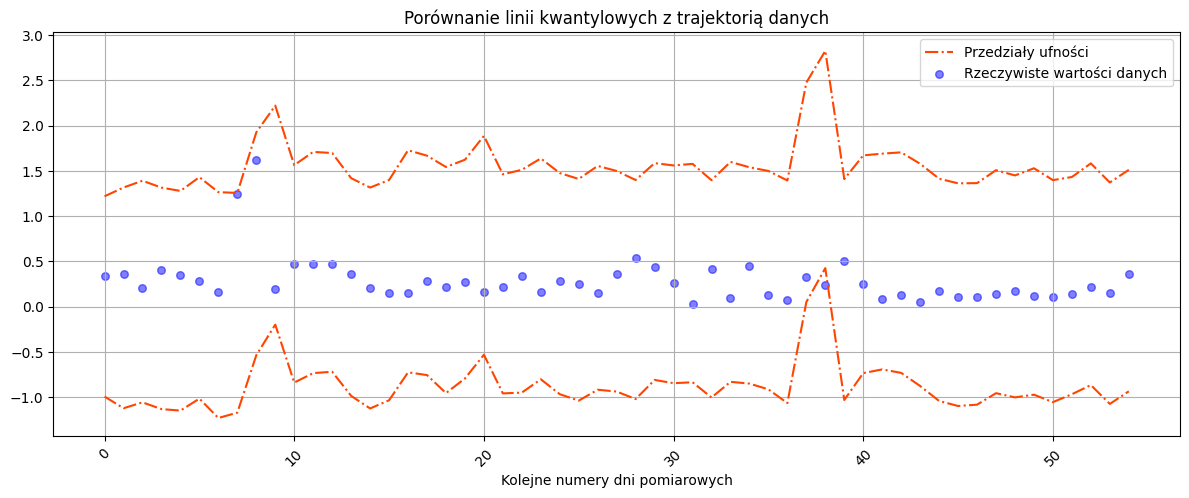

In [ ]:
train_data_NH4 = train_data['NH4']

okres_sez = 30

# Liczba próbek i długość danych
N = 10000
n = len(train_data[okres_sez:])

# Generowanie trajektorii ARMA
ar_models = [arma_generate_sample(ar=[1], ma=ma_params, nsample=n, scale=np.sqrt(sigma2) ) for _ in range(N)]
ar_seasonal_models = [ar_model + train_data_NH4[:-okres_sez] for ar_model in ar_models]

# Obliczanie kwantyli dla przedziału ufności
alpha = 0.05
quantiles_lower = np.quantile(ar_seasonal_models, alpha/2, axis=0)
quantiles_upper = np.quantile(ar_seasonal_models, 1 - alpha/2, axis=0) 

# Rysowanie wykresu
plt.figure(figsize=(12, 5)) 
line1, = plt.plot(range(n), quantiles_lower, c='orangered', linewidth=3/2, linestyle="dashdot") 
line2, = plt.plot(range(n), quantiles_upper, c='orangered', linewidth=3/2, linestyle="dashdot") 
line3 = plt.scatter(range(n), train_data_NH4[okres_sez:], s=30, c='blue', alpha=0.5) 
plt.legend([line1, line3], ['Przedziały ufności', 'Rzeczywiste wartości danych']) 
plt.xlabel('Kolejne numery dni pomiarowych') 
plt.grid() 
plt.title("Porównanie linii kwantylowych z trajektorią danych")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

MSE: 0.5201457881701168
RMSE: 0.7212113339168463


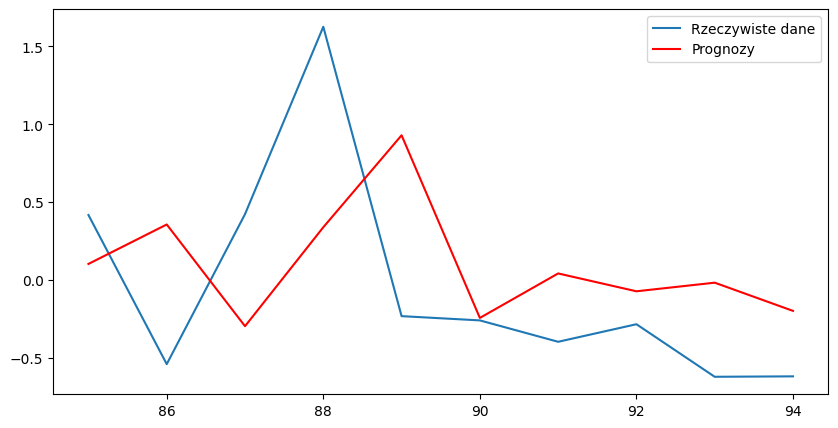

In [ ]:
# Upewnij się, że dane są w odpowiednim formacie
X_no_seasonality1 = pd.Series(X_no_seasonality).astype(float)

# Podział danych na zestaw treningowy i testowy (90% trening, 10% test)
train_data1 = X_no_seasonality1[:int(0.9 * len(X_no_seasonality1))]
test_data1 = X_no_seasonality1[int(0.9 * len(X_no_seasonality1)):]

# Prognozowanie krok-po-kroku na danych testowych
history = [x for x in train_data1]
predictions = list()

for t in range(len(test_data1)):
    model = ARIMA(history, order=(0, 0, 2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data1.iloc[t]
    history.append(obs)

# Ocena skuteczności modelu
mse = mean_squared_error(test_data1, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

station30 = data[data['ID_Station'] == 30]
xs = station30[:33]

# Wykres rzeczywistych danych testowych i prognoz
plt.figure(figsize=(10, 5))
plt.plot(test_data1.index, test_data1, label='Rzeczywiste dane')
plt.plot(test_data1.index, predictions, color='red', label='Prognozy')
plt.legend()
plt.show()

Text(0.5, 0, 't')

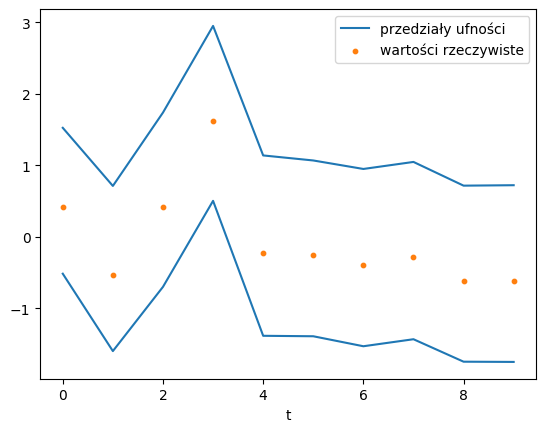

In [ ]:
n = len(test_data1)
N = 10000

parameters = model_fit.params
residuals = model_fit.resid

ar_models = [arma_generate_sample(ar=[1] + list(-parameters[1: -1]), ma=[1], nsample=n, scale=np.std(residuals)) for _ in range(N)]
ar_seasonal_models = [ar_model + test_data1.values for ar_model in ar_models]

quantiles_lower = np.quantile(ar_seasonal_models, alpha, axis=0)
quantiles_upper = np.quantile(ar_seasonal_models, 1 - alpha/2, axis=0)

station30 = data[data['ID_Station'] == 19]
xs = station30[:33]

line1, = plt.plot(range(n), quantiles_lower, c='C0')
line2, = plt.plot(range(n), quantiles_upper, c='C0')
line3 = plt.scatter(range(n), test_data1.values, s=10, c='C1')
plt.legend([line1, line3], ['przedziały ufności', 'wartości rzeczywiste'])
plt.xlabel('t')

In [275]:
# id-19
n = 1000
N = 1000
h= 20

ValueError: x and y must have same first dimension, but have shapes (21,) and (10,)

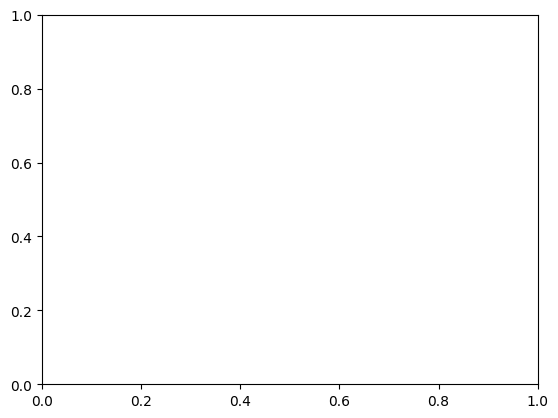

In [278]:
n = len(test_data2)
N = 10000
p2, q2 = 0, 1

model2 = ARIMA(X_no_seasonality2, order=(p2, 0, q2)).fit()

ar_models = [arma_generate_sample(ar=[1], ma=[1]+ list(-model2.params[1: -1]), nsample=n, scale=np.std(model2.resid)) for _ in range(N)]

correlation_matrix = np.array([tools.acf(m, nlags=h) for m in ar_models])

alpha = 0.05
quantiles_lower = np.quantile(correlation_matrix, alpha/2, axis=0)
quantiles_upper = np.quantile(correlation_matrix, 1 - alpha/2, axis=0)

line1, = plt.plot(range(h+1), quantiles_lower, linestyle="dashed", color="C1",linewidth=1.9)
plt.plot(range(h+1), quantiles_upper,  linestyle="dashed", color="C1",linewidth=1.9)
line2 = plt.scatter(range(h+1), tools.acf(train_data2, nlags=h), s=25)
plt.xlabel('h')
plt.ylabel('ACF(h)')
plt.legend([line1, line2], ['Przedział ufności', 'ACF danych'])
plt.xticks(ticks=range(0, 21, 5))
plt.grid()
plt.tight_layout()
